<img src="picture.png" />

## Overview

PASSNYC is a not-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students. New York City is home to some of the most impressive educational institutions in the world, yet in recent years, the City’s specialized high schools - institutions with historically transformative impact on student outcomes - have seen a shift toward more homogeneous student body demographics.

PASSNYC uses public data to identify students within New York City’s under-performing school districts and, through consulting and collaboration with partners, aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT). By focusing efforts in under-performing areas that are historically underrepresented in SHSAT registration, we will help pave the path to specialized high schools for a more diverse group of students.

## Exploratory Data Analysis of NY Schools

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import chart_studio.plotly as py

import plotly.io as pio
from IPython.display import Image

In [2]:
pd.set_option('display.max_columns', None)  
df = pd.read_csv('2016 School Explorer.csv')
shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('2010-2016-school-safety-report.csv')

In [3]:
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s 

In [4]:
df.shape

(1272, 161)

There are 1272 schools recorded in the data set

In [5]:
# Preprocess some data
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

## Map of New York State

<img src="picture2.png" />

## Map of Economic Need Index Distribution (Plotly)

__More Red__ = schools with __More Economic Need__<br>
__More Blue__ = schools with __Less Economic Need__

In [6]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

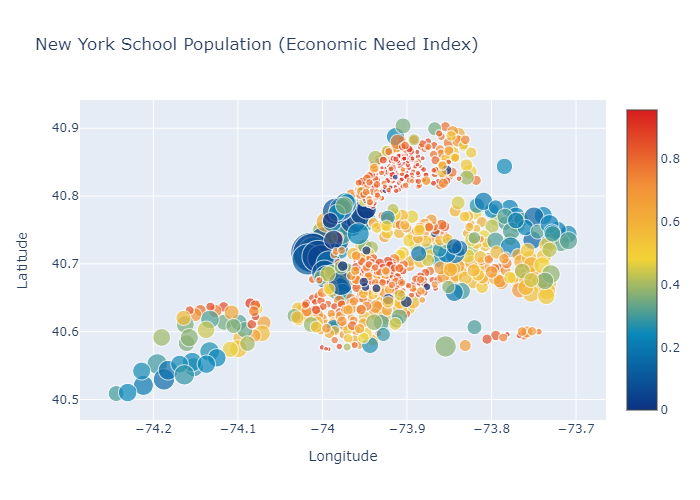

In [26]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

Schools in Upper and Central area of New York State have a higher economic need

## Map of Black/Hispanic Percentage Distribution

In [8]:
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

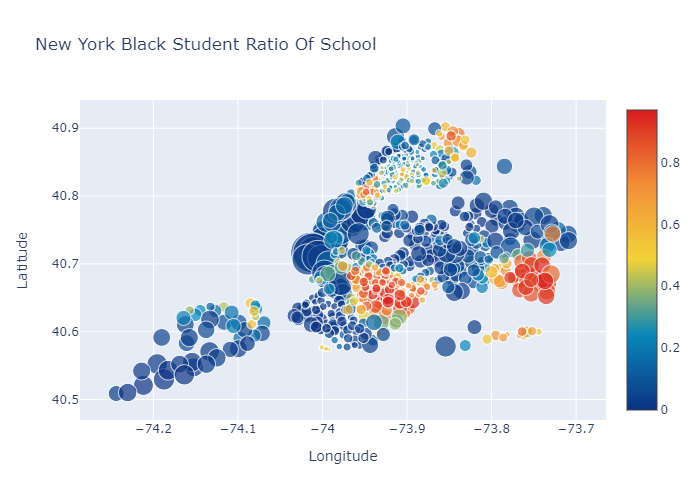

In [27]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Black"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

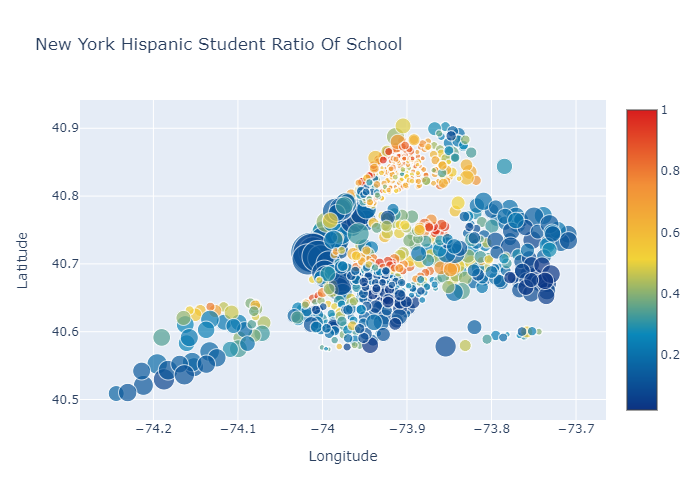

In [28]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Hispanic"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

While __Black__ and __Hispanic__ populations concentrate in different areas, they are both located in the areas of __higher economic need__ 

## Map of Asian/White Percentage Distribution

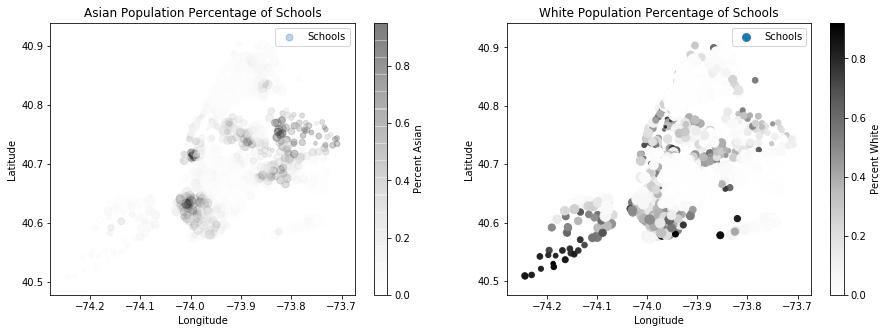

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

## Race Percentage Distribution

Text(0, 0.5, 'Employee Count')

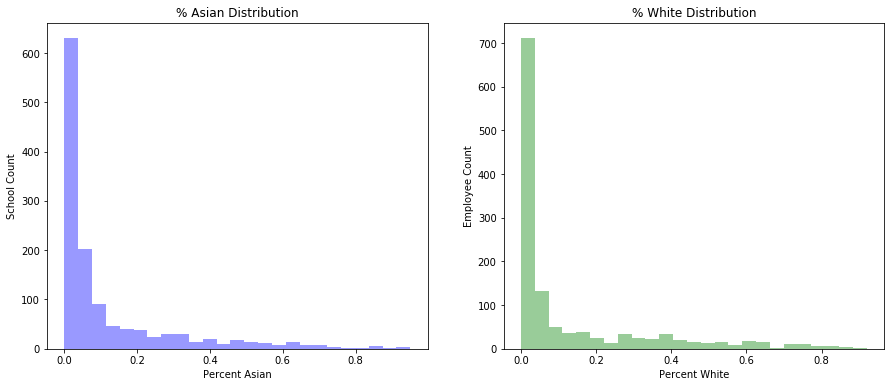

In [12]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Asian'], kde=False, color="b", ax=axes[0], bins=25).set_title('% Asian Distribution')
axes[0].set_ylabel('School Count')

# Graph Employee Evaluation
sns.distplot(df['Percent White'], kde=False, color="g", ax=axes[1], bins=25).set_title('% White Distribution')
axes[1].set_ylabel('Employee Count')

Text(0, 0.5, 'Employee Count')

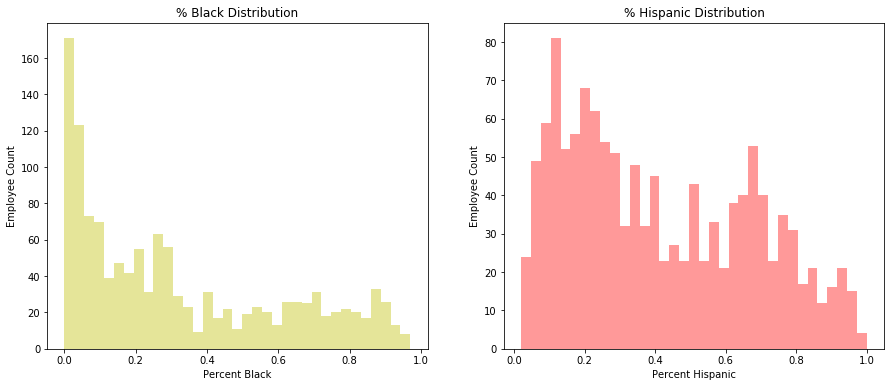

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Black'], kde=False, color="y", ax=axes[0], bins=35).set_title('% Black Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Hispanic'], kde=False, color="r", ax=axes[1], bins=35).set_title('% Hispanic Distribution')
axes[1].set_ylabel('Employee Count')

- Majority of the schools have 10% or less white and asian students
- Black and Hispanic represent majority of the schools' population

## Race vs. Economic Need Index

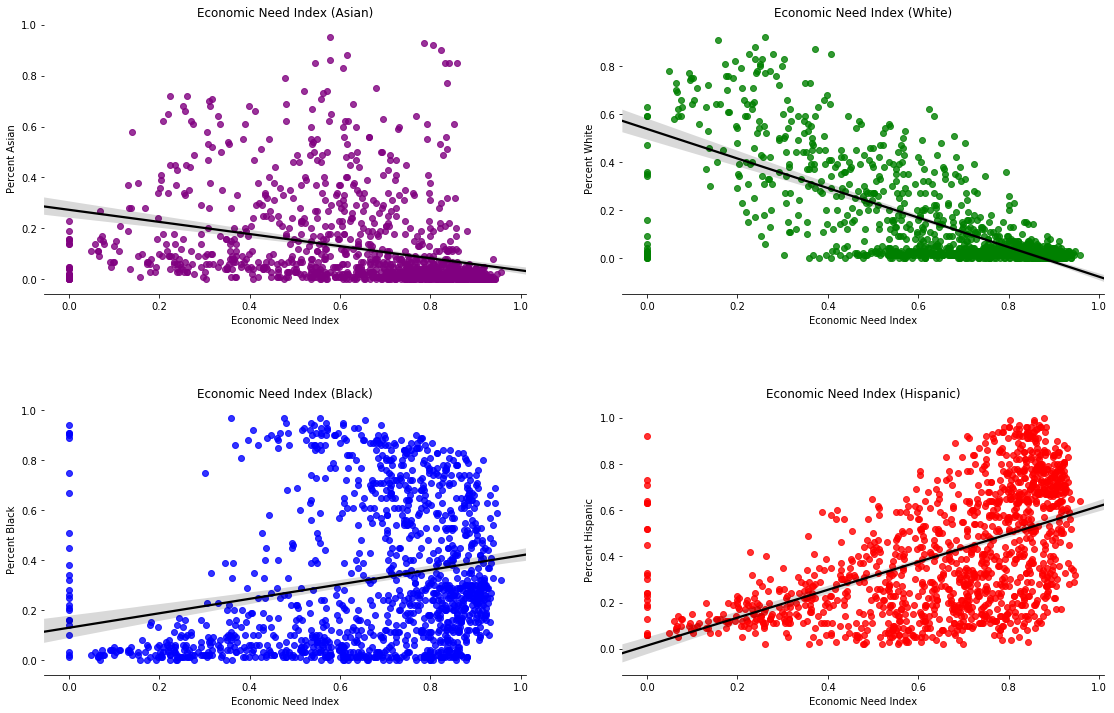

In [14]:
f, axes = plt.subplots(2, 2, figsize=(19, 12), sharex=False)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='purple', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='g', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='b', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='r', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Economic Need Index (Asian)')
axes[0,1].set_title('Economic Need Index (White)')
axes[1,0].set_title('Economic Need Index (Black)')
axes[1,1].set_title('Economic Need Index (Hispanic)')

plt.subplots_adjust(hspace=0.4)

- Schools with a __higher White and Asian__ population tend to have a __lower ENI__
- Schools with a __higher Hispanic or Black__ population tend to have a __Higher ENI__

## Map of Absent Rate Distribution

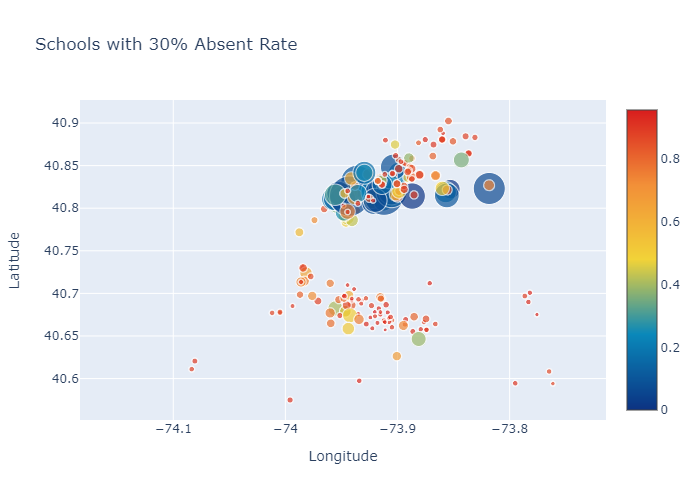

In [29]:
# Create a dataframe of schools with an absent rate of 30% or more.
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# Create a dataframe of schools with an absent rate of 11% or less.
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# Exploring School Absent Rate 
df['Percent of Students Chronically Absent'].describe()
data = [
    {
        'x': absent_30["Longitude"],
        'y': absent_30["Latitude"],
        'text': absent_30["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 30% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

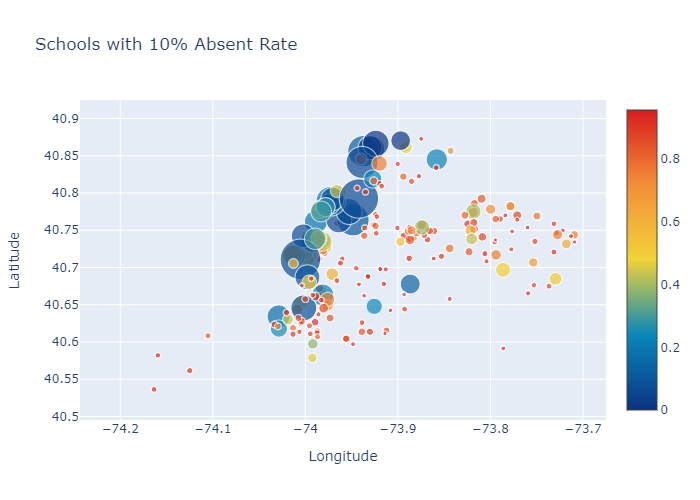

In [30]:
data = [
    {
        'x': absent_11["Longitude"],
        'y': absent_11["Latitude"],
        'text': absent_11["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 10% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

Most of the schools with 30% absent rate are from the North Country, while schools with 10% absent rate are more dispersed across the state

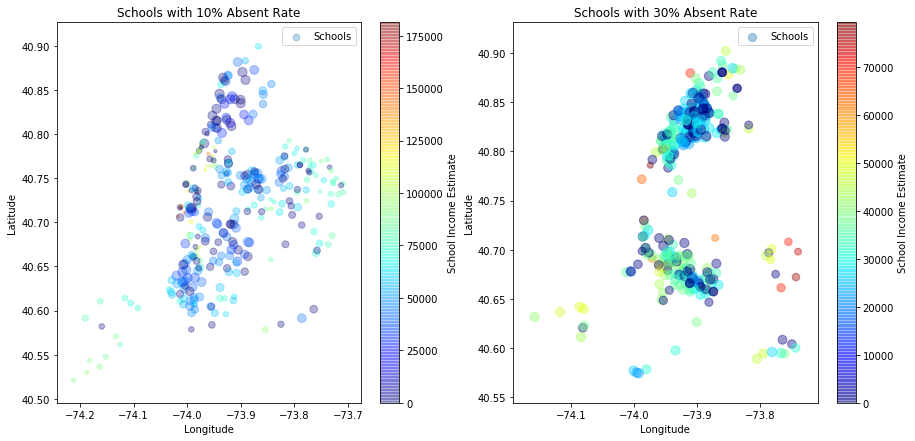

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

absent_11.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=absent_11['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Schools with 10% Absent Rate',
    colorbar=True, alpha=0.3, figsize=(15,7))

absent_30.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=absent_30['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Schools with 30% Absent Rate',
    colorbar=True, alpha=0.4, figsize=(15,7))

plt.show()

## Student ELA & Maths Performance By Race

Text(0, 0.5, 'Frequency Count')

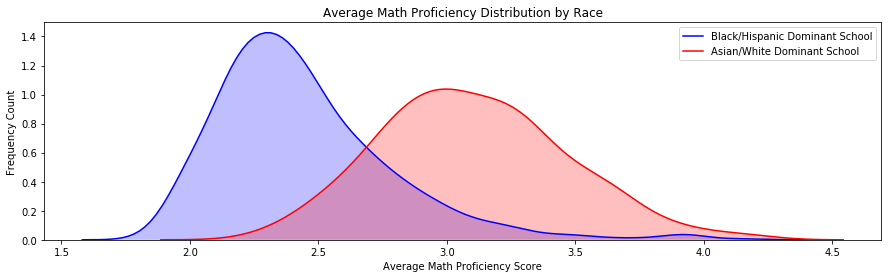

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Create New Column for Black/Hispanic Dominant Schools
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >= .70

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

Text(0, 0.5, 'Frequency Count')

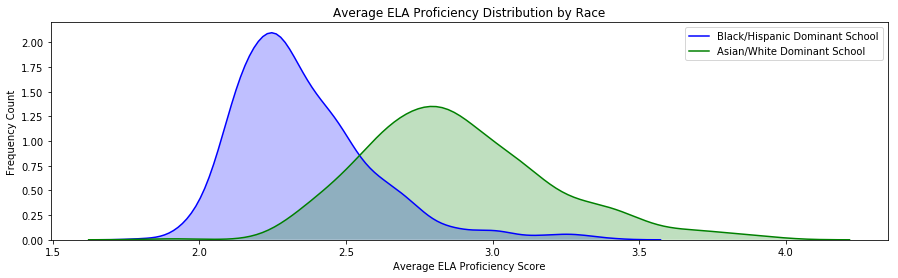

In [19]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average ELA Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average ELA Proficiency'] , color='g',shade=True, label='Asian/White Dominant School')
plt.title('Average ELA Proficiency Distribution by Race')
plt.xlabel('Average ELA Proficiency Score')
plt.ylabel('Frequency Count')

Average ELA and Maths scores are significantly higher in white/asian dominant schools than black/hispanic dominant schools

## Maths Test Perfomance by Race

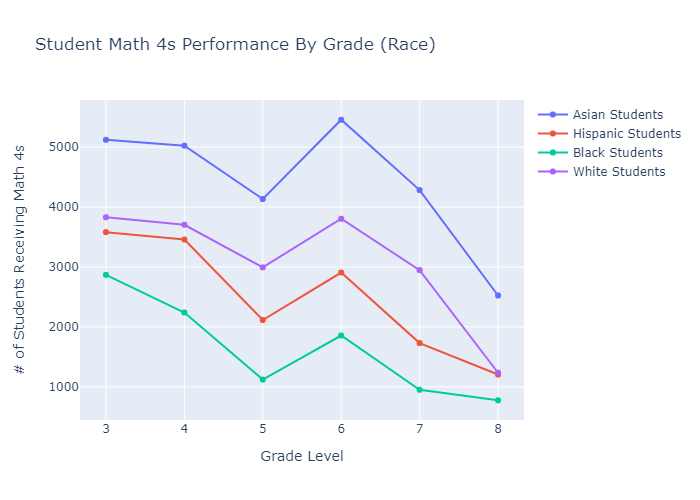

In [31]:
# Create the math scores for each race
asian_math = []
asian_math.append(sum(df['Grade 3 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 4 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 5 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 6 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 7 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 8 Math 4s - Asian or Pacific Islander']))

white_math = []
white_math.append(sum(df['Grade 3 Math 4s - White']))
white_math.append(sum(df['Grade 4 Math 4s - White']))
white_math.append(sum(df['Grade 5 Math 4s - White']))
white_math.append(sum(df['Grade 6 Math 4s - White']))
white_math.append(sum(df['Grade 7 Math 4s - White']))
white_math.append(sum(df['Grade 8 Math 4s - White']))

black_math = []
black_math.append(sum(df['Grade 3 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 4 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 5 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 6 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 7 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 8 Math 4s - Black or African American']))

hispanic_math = []
hispanic_math.append(sum(df['Grade 3 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 4 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 5 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 6 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 7 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 8 Math 4s - Hispanic or Latino']))
# Create dataframe of math scores
race_mathscores = pd.DataFrame({'Asian Math':asian_math,'Black Math':black_math,'White Math':white_math, 'Hispanic Math':hispanic_math})
race_mathscores['Grade'] = [3,4,5,6,7,8]
# Create a trace
trace = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Asian Math'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Hispanic Math'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Black Math'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['White Math'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math 4s Performance By Grade (Race)',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='# of Students Receiving Math 4s'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

## ELA Test Performance by Race

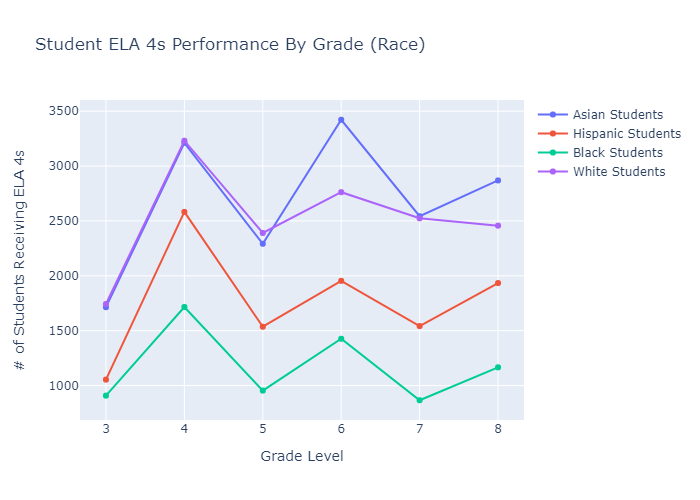

In [32]:
# Create the math scores for each race
asian_ELA = []
asian_ELA.append(sum(df['Grade 3 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 4 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 5 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 6 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 7 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 8 ELA 4s - Asian or Pacific Islander']))

white_ELA = []
white_ELA.append(sum(df['Grade 3 ELA 4s - White']))
white_ELA.append(sum(df['Grade 4 ELA 4s - White']))
white_ELA.append(sum(df['Grade 5 ELA 4s - White']))
white_ELA.append(sum(df['Grade 6 ELA 4s - White']))
white_ELA.append(sum(df['Grade 7 ELA 4s - White']))
white_ELA.append(sum(df['Grade 8 ELA 4s - White']))

black_ELA = []
black_ELA.append(sum(df['Grade 3 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 4 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 5 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 6 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 7 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 8 ELA 4s - Black or African American']))

hispanic_ELA = []
hispanic_ELA.append(sum(df['Grade 3 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 4 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 5 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 6 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 7 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 8 ELA 4s - Hispanic or Latino']))
# Create dataframe of ELA scores
race_ELA = pd.DataFrame({'Asian ELA':asian_ELA,'Black ELA':black_ELA,'White ELA':white_ELA, 'Hispanic ELA':hispanic_ELA})
race_ELA['Grade'] = [3,4,5,6,7,8]
# Create a trace
trace = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Asian ELA'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Hispanic ELA'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Black ELA'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['White ELA'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student ELA 4s Performance By Grade (Race)',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='# of Students Receiving ELA 4s'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')
Image(pio.to_image(fig, format='png'))

## School Income vs. Economic Need Index

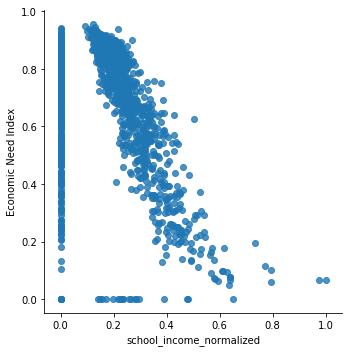

In [22]:
# Let's normalize the School Income Estimate to have better visualization
from sklearn import preprocessing

# Impute the missing Income with the median
median = df['School Income Estimate'].median()
df['School Income Estimate'] = df['School Income Estimate'].fillna(median)

# Create x, where x the 'scores' column's values as floats
x = df[['School Income Estimate']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
school_income_normalized = pd.DataFrame(x_scaled)

df['school_income_normalized'] = school_income_normalized
sns.lmplot(x='school_income_normalized', y='Economic Need Index', data=df,
           fit_reg=False) # No regression line
plt.show()

## Top 10 Cities and School Income

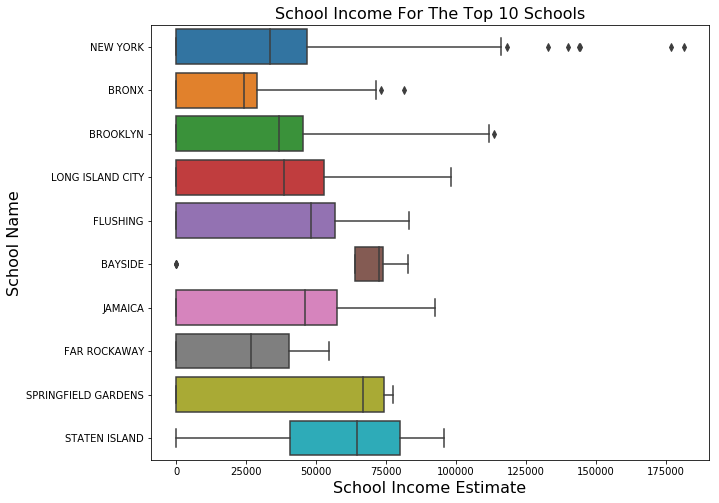

In [23]:
city = df.groupby('City')['Zip'].count().reset_index().sort_values('Zip', ascending=False).reset_index(drop=True)
city_community = df[df['Community School?'] == 'Yes'].groupby('City')['Zip'].count().reset_index().sort_values('Zip', ascending=False).reset_index(drop=True)

city_merge = pd.merge(city, city_community, how='left', on='City')
city_merge.fillna(0, inplace=True)
city_merge['Zip_y'] = city_merge['Zip_y'].astype(int)

top_10_city = city_merge.iloc[:10,]
top_10_city = top_10_city.rename(columns={"Zip_x":'Total Count', "Zip_y":'Community Count'})
top10_city_list = list(top_10_city.City)

temp=df[df.City.isin(top10_city_list)]
plt.figure(figsize=(10,8))
sns.boxplot( x='School Income Estimate', y='City',data=temp)
plt.title("School Income For The Top 10 Schools", fontsize=16)
plt.xlabel("School Income Estimate", fontsize=16)
plt.ylabel("School Name", fontsize=16)
plt.show();